In [67]:
#############
###paths#####
#############
import sys
import os

pwd = os.getcwd()
modellingpath = pwd.rpartition("modelling")[0] + pwd.rpartition("modelling")[1] 
sys.path.append(modellingpath + '/lib')
#############

import pickle
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns


In [68]:
# Specify name of circuit and variant investigated
circuit_n='circuit14'
variant='2nd'
# Specifiy number of parameter sets in parameterset file to be loaded
n_param_sets = 1000000

# print(f'Circuit:{circuit_n}, Variant:{variant}')
# lhs_df = pickle.load( open(modellingpath + '/3954/paper/input/lhs_parameterfiles/df_%s_variant%s_%rparametersets.pkl'%(circuit_n,variant,100000), "rb"))
# lhs_df = pickle.load( open(modellingpath + '/3954/paper/input/lhs_parameterfiles/df_circuit14_variant2nd_100000parametersets', 'rb'))

balanced_lsa_df= pickle.load( open(modellingpath + '/3954/paper/out/analytical/lsa_dataframes/all_dataframes/lsa_df_%s_variant%s_%rparametersets_balanced.pkl'%(circuit_n,variant,n_param_sets), "rb"))
print(balanced_lsa_df['system_class'].value_counts())

variant='fitted7'
n_param_sets = 4000
# fitDf = pickle.load( open(modellingpath + '/3954/paper/input/fitted_parameterfiles/df_%s_variant%s_%rparametersets.pkl'%(circuit_n,variant,n_param_sets), "rb"))

fit_df = pickle.load( open(modellingpath + '/3954/paper/input/fitted_parameterfiles/df_%s_variant%s_%sparametersets_balancedSemiBalanced.pkl'%(circuit_n,variant,n_param_sets), "rb"))
# fit_df = pickle.load( open(modellingpath + '/3954/paper/out/analytical/lsa_dataframes/all_dataframes/lsa_df_%s_variant%s_%sparametersets_balancedSemiBalanced.pkl'%(circuit_n,variant,n_param_sets), "rb"))
# print(fit_df['system_class'].value_counts())


simple stable           1009508
hopf                      92009
complex unstable          82471
no steady state            8100
turing I oscillatory        171
turing I hopf                47
turing I                      5
Name: system_class, dtype: int64


In [69]:
instabilities = ['turing I', 'turing II', 'turing I hopf', 'turing I oscillatory', 'turing II hopf','hopf', 'turing semi-hopf']  
instabilities_df = balanced_lsa_df.loc[balanced_lsa_df['system_class'].isin(instabilities)]

turingStates = ['turing I','turing I oscillatory']  
turing_df = balanced_lsa_df.loc[balanced_lsa_df['system_class'].isin(turingStates)]
zeroSignChanges_df = balanced_lsa_df.loc[balanced_lsa_df['system_class'].isin(['Zero sign changes'])]
turing_df       

,,Dr,Va,Vb,Vc,Vd,Ve,Vf,Kda,Kub,Keb,...,nee,neb,nce,balance,ss_n,ss_list,ss_class,system_class,maxeig,complex_dispersion
3966,1,0.033591,525.870788,192.596543,389.848725,281.336797,106.70254,91.260505,1.189362,190.099619,1.632053,...,4.0,4.0,3.0,Balanced,2.0,"[4.2635, 4.0055, 3.4194, 15.0508, 1.3025, 5.5578]",stable spiral,turing I oscillatory,0.305952+0.000000j,True
4085,1,0.030486,15.688245,36.129485,980.317753,80.781394,148.068925,459.066671,2.786076,8.148615,1.120108,...,4.0,4.0,3.0,Balanced,3.0,"[1.5855, 3.8608, 37.5857, 14.1502, 1.1357, 75....",stable spiral,turing I oscillatory,0.437501+0.000000j,True
10335,0,0.04055,38.232059,18.291744,285.6555,131.493832,24.996987,16.34304,8.568025,18.359186,9.519621,...,4.0,4.0,3.0,Balanced,3.0,"[5.3791, 4.4687, 33.7194, 23.8223, 6.3258, 3.8...",stable spiral,turing I oscillatory,0.634882+0.000000j,True
15760,1,0.047993,570.432033,366.254962,975.682321,735.347987,47.357686,22.33761,1.205247,10.248279,17.991124,...,4.0,4.0,3.0,Balanced,2.0,"[4.1214, 5.7553, 6.3389, 16.2484, 38.5548, 1.4...",stable spiral,turing I oscillatory,0.368924+0.000000j,True
20766,0,0.011926,203.761037,463.940452,373.269337,33.65683,35.312855,10.68041,1.002875,57.528117,1.015736,...,4.0,4.0,3.0,Balanced,3.0,"[1.8757, 6.8003, 2.6042, 15.2649, 1.1289, 5.5267]",stable spiral,turing I oscillatory,0.018485+0.000000j,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
974496,1,0.078051,604.235295,730.952934,50.031117,213.461241,449.902398,620.723609,6.741239,27.751596,1.562021,...,4.0,4.0,3.0,Balanced,3.0,"[2.677, 42.0675, 1.1389, 127.7821, 1.3548, 369...",stable spiral,turing I oscillatory,0.223218+0.000000j,True
983665,0,0.012135,178.351788,75.804113,15.884564,147.686856,11.15878,22.905494,9.363008,56.658395,9.247058,...,4.0,4.0,3.0,Balanced,1.0,"[15.3089, 7.1826, 2.2744, 31.7023, 10.4132, 5....",stable spiral,turing I oscillatory,0.278265+0.000000j,True
985253,0,0.016053,78.216495,14.652087,876.68531,508.937765,214.45374,13.654328,41.315232,6.359916,32.752138,...,4.0,4.0,3.0,Balanced,3.0,"[2.6585, 4.8618, 19.5887, 280.7076, 19.2137, 8...",stable spiral,turing I oscillatory,0.004971+0.000000j,True
992274,1,0.061082,736.600537,17.744173,47.392415,47.651823,86.467244,161.903381,4.866655,198.513256,4.21932,...,4.0,4.0,3.0,Balanced,3.0,"[30.3248, 2.9116, 2.8867, 23.9005, 2.9221, 78....",stable spiral,turing I oscillatory,0.310925+0.000000j,True


In [70]:
fit_df

,Dr,Va,Vb,Ve,Kub,Keb,Kee,muLVA,muASV,nub,...,nce,nfe,Vf,Kvd,Kfe,Vc,Vd,Kda,Kce,balance
0,4.087668,70.134385,31.139483,7.781011,3.934959,26.719817,0.001,3.626803,1.0,1.0,...,3.0,8.0,3.477244,29.016328,1.772555,29.112951,7.432092,40.108647,6.085553,Semi balanced
3,0.093370,505.398444,127.323777,11.429026,266.386082,0.513221,0.001,3.575737,1.0,1.0,...,3.0,8.0,3.401628,25.023955,1.644404,22.795052,6.947261,28.193986,4.143476,Semi balanced
5,0.059446,145.131233,50.649483,7.573907,0.237184,0.114384,0.001,4.169985,1.0,1.0,...,3.0,8.0,3.379968,41.828329,0.564714,1.882950,6.344188,60.228806,1.835598,Semi balanced
8,14.951981,10.456251,26.203176,8.144987,41.978845,1.101322,0.001,4.229641,1.0,1.0,...,3.0,8.0,3.566680,37.048420,1.292562,13.298325,6.069143,15.021840,1.701260,Semi balanced
10,0.114724,133.592813,214.297922,9.861984,3.238831,9.384684,0.001,3.841775,1.0,1.0,...,3.0,8.0,3.442378,28.487903,1.606658,23.687740,7.709786,26.740199,4.612311,Semi balanced
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3977,7.183994,181.489095,203.437648,9.517397,76.085582,7.568481,0.001,3.402504,1.0,1.0,...,3.0,8.0,3.756047,17.451251,2.279043,11.738689,6.756299,57.108756,3.006737,Semi balanced
3979,0.154569,16.694300,664.438919,7.964389,34.136135,59.348266,0.001,3.432215,1.0,1.0,...,3.0,8.0,3.438688,30.044657,1.436558,5.535087,6.373695,30.585938,0.491324,Semi balanced
3981,1.033550,285.543048,232.892433,9.574836,0.929836,0.353921,0.001,3.311882,1.0,1.0,...,3.0,8.0,3.585368,18.338200,2.307099,12.633185,6.498429,24.147819,2.682369,Semi balanced
3987,80.740163,333.099787,948.333596,15.465924,0.304738,41.765163,0.001,3.981077,1.0,1.0,...,3.0,8.0,3.780747,16.578541,3.065936,31.084322,7.125043,3.473910,6.305394,Semi balanced


In [71]:
paramList = fit_df.columns[:-1]
len(paramList)

23

In [72]:
# pfitDict = {'Vc': 99.99999998437673,
# 'Vd': 8.845204237579598,
# 'Ve': 99.99999902098732,
# 'Vf': 8.394996554940189,
# 'Kvd': 0.9400832873750722,
# 'Kda': 4.142114110177617,
# 'Kce': 4.342277899710668,
# 'Kfe': 0.4319218458202641}


# paramList = pfitDict.keys()


/var/folders/bt/1cqt3cks1sl9cz4dfwlyxhpm0000gn/T/ipykernel_12804/3625690115.py:20: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(fitDf.iloc[:crop,count].values,bins=newBins, kde=False, color = 'black', ax = axs[count], label='Fit')
/var/folders/bt/1cqt3cks1sl9cz4dfwlyxhpm0000gn/T/ipykernel_12804/3625690115.py:21: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.git

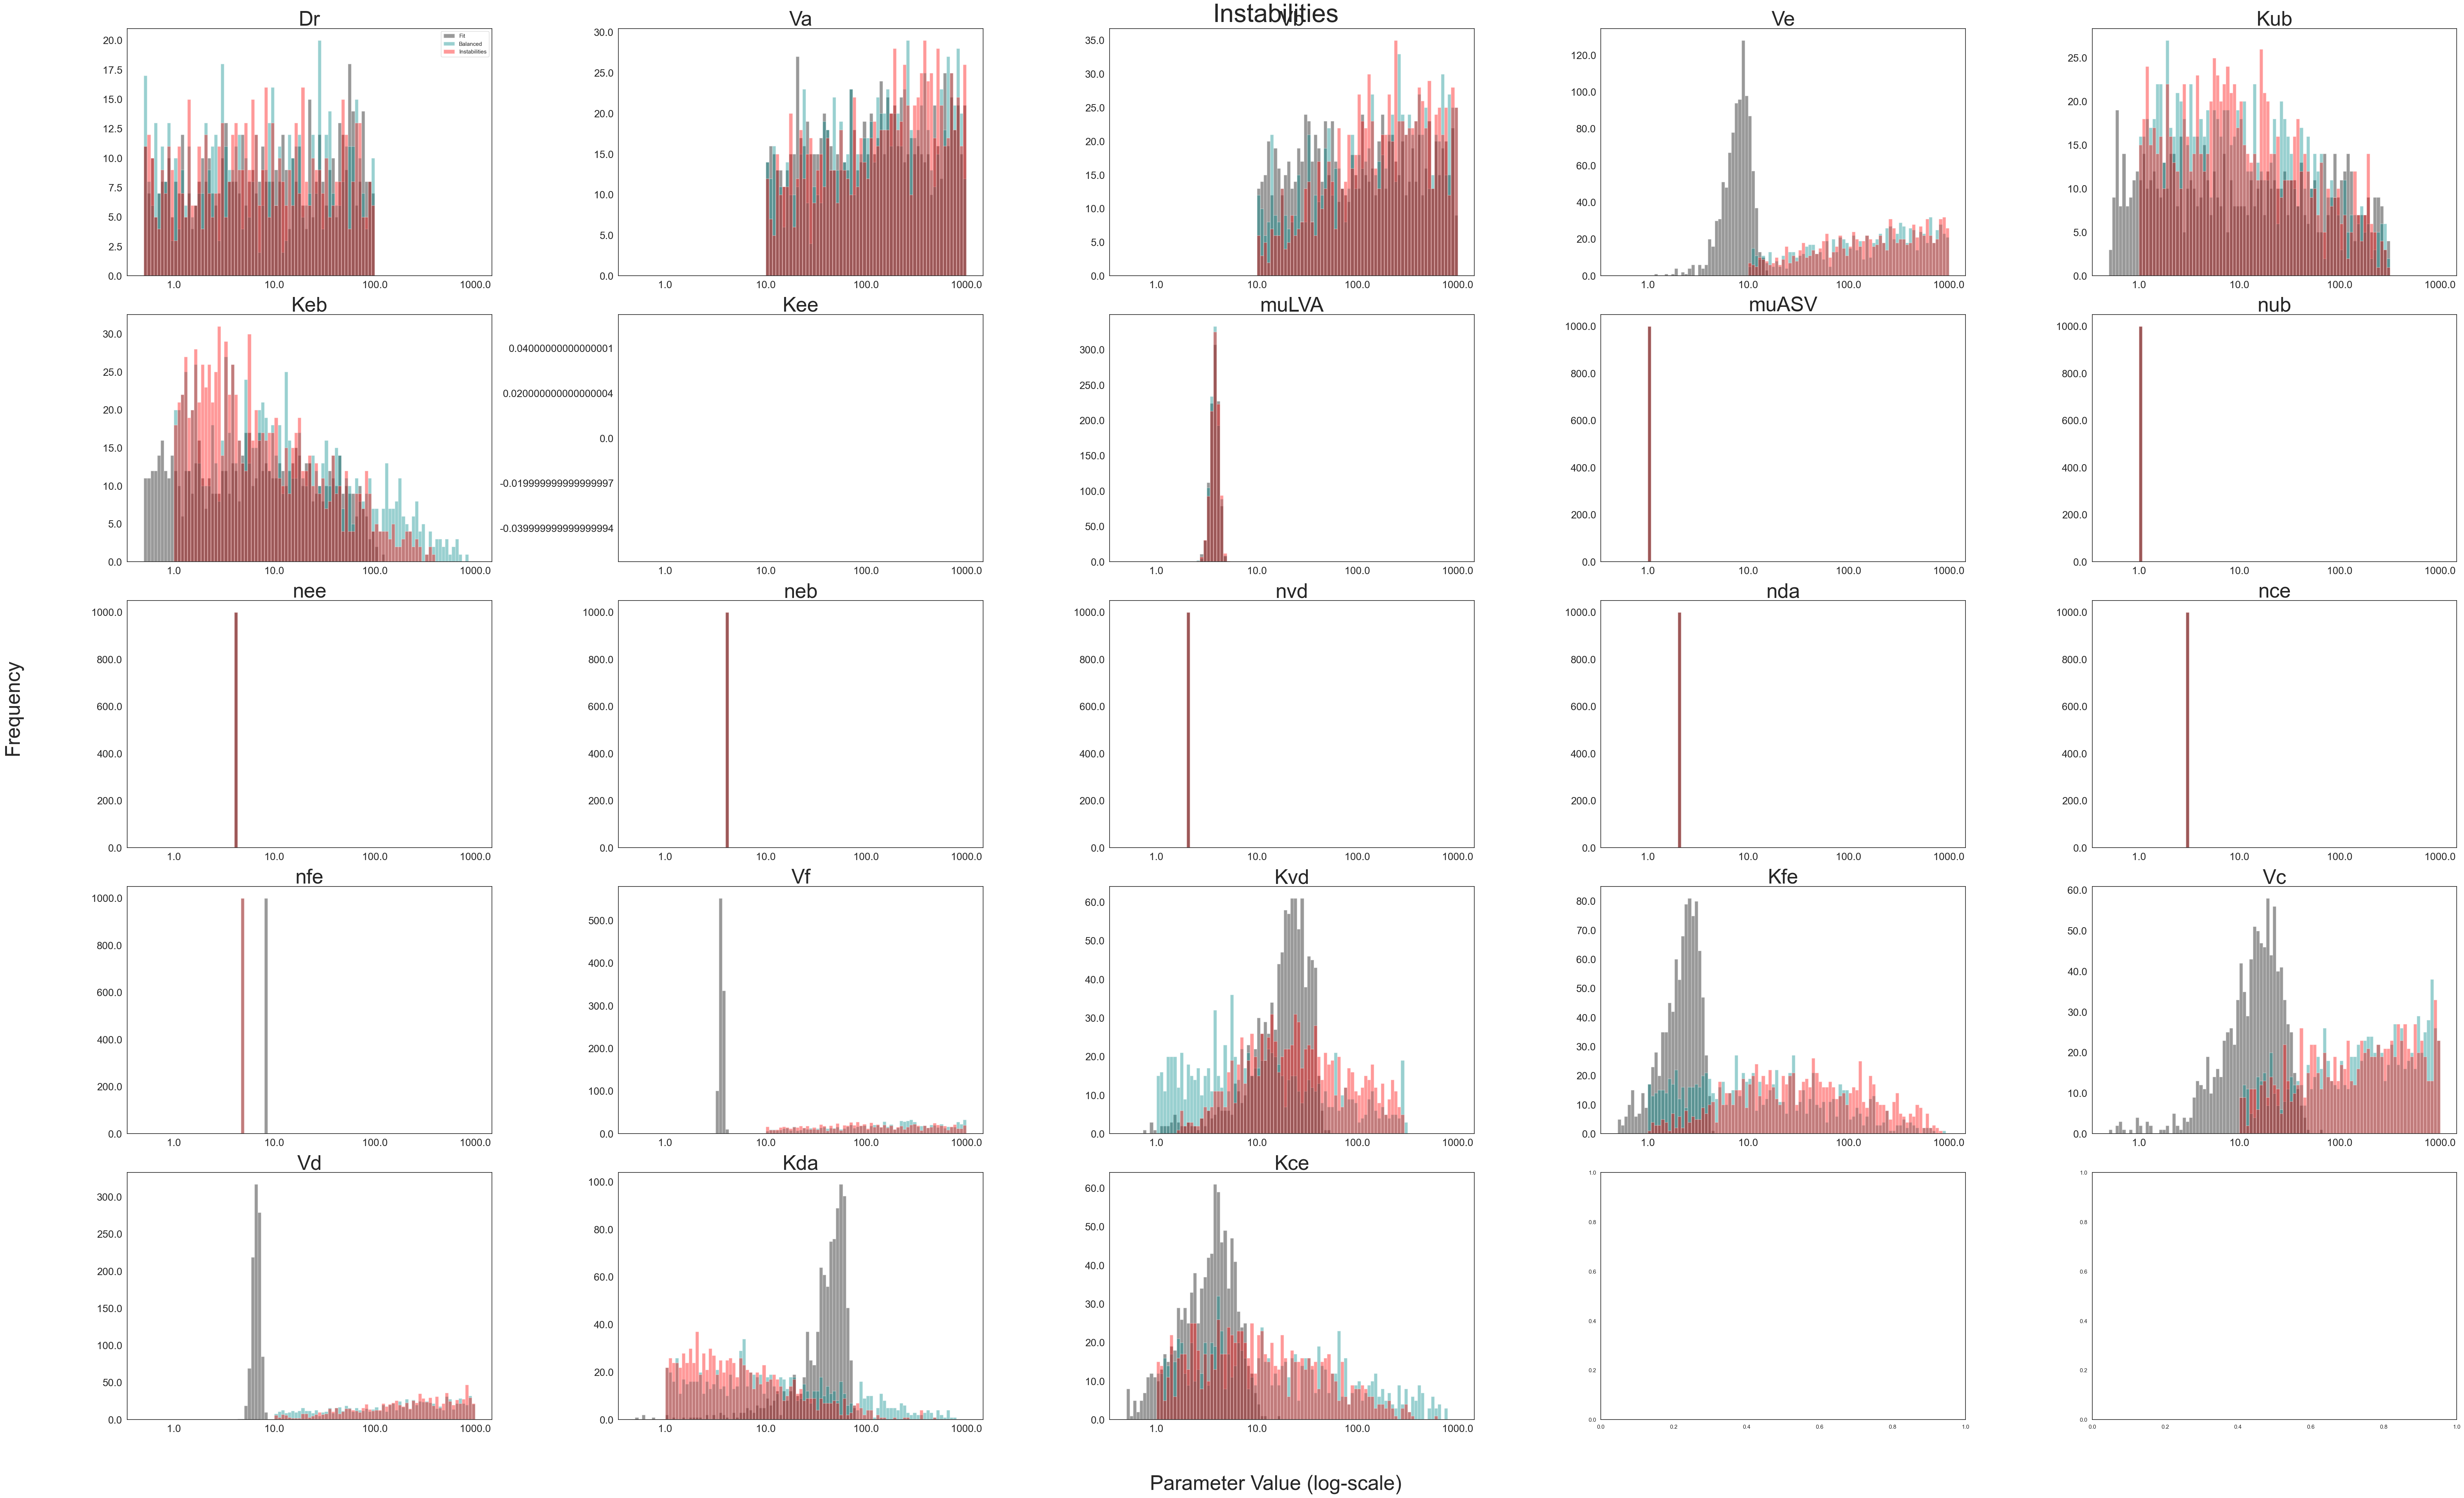

In [73]:
from scipy import stats
def paramsHistogram(balancedDf,specificDf,fitDf,title,crop=2000):
    sns.set(style="white", palette="muted", color_codes=False)

    fig, axs = plt.subplots(nrows=5, ncols=5, figsize=(65,40))
    axs = axs.flatten()
    palette = sns.diverging_palette(10, 220, n=2)
    # paramList=['Dr','VA','VB','VC','VD','VE','VF', 'Kda','Kab', 'Keb', 'Kbd', 'Kfe', 'Kee', 'Kce', 'muLVA']
    df_concat = pd.concat([balancedDf,specificDf,fitDf])
    # df_concat[(np.abs(stats.zscore(df_concat)) < 3).all(axis=1)]
    # df_concat[np.abs(df_concat.Data-df_concat.Data.mean()) <= (3*df_concat.Data.std())]

    for count, parameter in enumerate(paramList):
    # for count, parameter in enumerate(lsa_df.columns[:24]):
        q = df_concat[parameter].quantile(0.3)
        df_concat[df_concat[parameter] < q]
        LogMin, LogMax = np.log10(df_concat.iloc[:,count].min()),np.log10(df_concat.iloc[:,count].max())
        # newBins = np.logspace(LogMin/10, LogMax,100)
        newBins = np.logspace(-0.3,3,100)
        sns.distplot(fitDf.iloc[:crop,count].values,bins=newBins, kde=False, color = 'black', ax = axs[count], label='Fit')
        sns.distplot(balancedDf.iloc[:crop,count].values,bins=newBins, kde=False, color = 'darkcyan', ax = axs[count], label='Balanced')
        sns.distplot(specificDf.iloc[:crop,count].values,bins=newBins, kde=False, color = 'red', ax = axs[count], label=title)
        # sns.distplot(fitDf.iloc[:crop,count].values,bins=newBins, kde=False, color = 'black', ax = axs[count], label='Fit')

        axs[count].set_xscale('log')
        axs[count].set_yticklabels(axs[count].get_yticks(), size = 20)
        axs[count].set_xticklabels(axs[count].get_xticks(), size = 20)

        axs[count].set_title(str(parameter),fontsize=40)
        axs[0].legend()
    
    fig.suptitle(title, fontsize=50)
    fig.tight_layout()
    fig.text(0.5,-0.03, "Parameter Value (log-scale)", ha="center", va="center",  fontsize=40)
    fig.text(-0.03,0.5, "Frequency", ha="center", va="center", rotation=90 ,fontsize=40)
    plt.show()


balanced_lsa_df = balanced_lsa_df[paramList]
instabilities_df = instabilities_df[paramList]
turing_df = turing_df[paramList]
fit_df= fit_df[paramList]

paramsHistogram(balanced_lsa_df,instabilities_df,fit_df, 'Instabilities',crop=1000)



In [ ]:
balanced_lsa_df = balanced_lsa_df[paramList]
instabilities_df = instabilities_df[paramList]
fit_df = fit_df[paramList]
balanced_lsa_df_drop = balanced_lsa_df.droplevel(level=1)
# balanced_lsa_df_drop = balanced_lsa_df_drop.reset_index(inplace=True, drop=True)
instabilities_df_drop = instabilities_df.droplevel(level=1)
# instabilities_df_drop = instabilities_df_drop.reset_index(inplace=True, drop=True)
fit_df_drop = fit_df.reset_index()
crop=100
sourcelist = np.concatenate((np.random.normal(loc=1,size=crop,scale=0.0001), np.random.normal(loc=2,size=crop,scale=0.0001), np.random.normal(loc=3,size=crop,scale=0.0001)))
# sourcelist = np.concatenate(([1]*crop, [2]*crop ,[3]*crop))



concat_df = pd.concat([balanced_lsa_df_drop.iloc[:crop], instabilities_df_drop.iloc[:crop],fit_df[:crop]], ignore_index=True, axis=0)
concat_df['source'] = sourcelist
concat_df
pairplot = sns.pairplot(concat_df, hue='source', palette="icefire")
for ax in pairplot.axes.flat:
    ax.set(xscale="log")
    ax.set(yscale="log")
# sns.pairplot(data=concat_df, hue='source', palette="Paired")
plt.show()